# Question 1
### we will start with importing the necessary libraries and the data file

In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
%matplotlib inline

In [42]:
df = pd.read_csv('/Users/dimagoroh/Desktop/data_vis/big_file.csv', low_memory=False)

## now we will do some data cleaning; starting with dropping the two empty columns
## turning our time column to a DateTime object so that we can easily extract the year, hour, etc

In [43]:
df=df.drop(['downloadSpeed', 'uploadSpeed'], axis=1)
df = df.dropna()
df["time"] = df['date'].astype(str) + " " +df["hour"]
df['time'] = pd.to_datetime(df["time"])
df['year']=df['time'].dt.year
df['hour_time']=df['time'].dt.hour
df=df[df['speed'] >0] 

### now we will start exploring our data, at first we will build a plot of time Vs speed 
### with the first plot we can already get a clear understanding of our data and if it changes with the year, but to get a better sense, the data can be shown as a line plot
### our data set has a very high variance of measurement and a lot of duplicate measurement values at each measuring point.
### so we need to scale the data, using average on a high variance data set is not a good idea because avarage is sensitive to high outliers, so in this case, i opted to use median

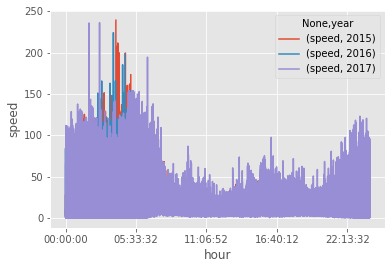

In [44]:
plt.style.use('ggplot')
pivot_df=df[['time','year']]
%matplotlib inline
import matplotlib.pyplot as plt
df.pivot_table(index='hour', columns='year',
                    aggfunc={'speed':'median'}).plot()
plt.ylabel('speed');

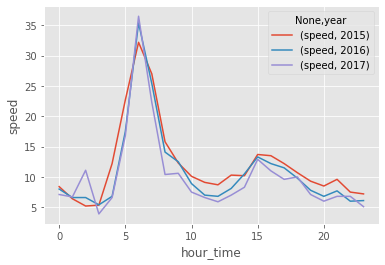

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
df.pivot_table(index='hour_time', columns='year',
                    aggfunc={'speed':'median'}).plot()
plt.ylabel('speed');

### as we can see the general relationship between the speed and time is that as we go later in the day the speed decreases, which is logical if we think about it because more and more people, big decrease in the moring time and a slight rise from 10 am to about 3 pm
### connect to the network, the network needs to handle more load so speed will drop.
### in general the best time of day to connect would be in the early morning time 5-6 am 
### we can see that over all 2017 was the slowest speed but not by much almost at all points of the day 2017 is lower then 2016 and 2016

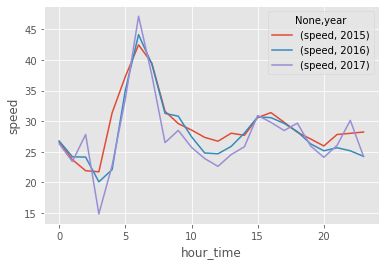

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
df.pivot_table(index='hour_time', columns='year',
                    aggfunc={'speed':'mean'}).plot()
plt.ylabel('speed');

In [50]:
df['operator'] = df['operator'].str.upper()

In [51]:
df.groupby(['operator'])['operator'].count().sort_values(ascending=False).head(10)

operator
MOVISTAR       3548782
VODAFONE ES    2231806
ORANGE         1642440
JAZZTEL         382822
PEPEPHONE       347212
YOIGO           306619
RACC            123515
SIMYO           116955
ORANGE SP        90269
ONO              41884
Name: operator, dtype: int64

# Question 2
## we will start by exploring our data because the question asks us to compare different operators the easiest way to quickly do that would be with a pivot table.
## we were asked to compare with the main operators so we will use the Pareto rule and pick the top 3 operators that represent more than 80% of the total measurements of the data set

In [52]:
operator_list = ['MOVISTAR','VODAFONE ES','ORANGE']
filtered_df = df[df['operator'].isin(operator_list)]
filtered_df.pivot_table(index=["description","activity"], columns='operator',
                    aggfunc={'status':'count'})

status                      
operator                          MOVISTAR    ORANGE VODAFONE ES
description          activity                                   
STATE_EMERGENCY_ONLY IN_VEHICLE  1870726.0  832373.0   1120384.0
                     ON_BICYCLE    69891.0   24593.0     46768.0
                     ON_FOOT      582793.0  321067.0    427512.0
                     STILL        307176.0  138161.0    194989.0
                     TILTING      293242.0  130820.0    186859.0
                     UNKNOWN      173853.0   79809.0    120964.0
STATE_IN_SERVICE     IN_VEHICLE    52580.0   32714.0     23802.0
                     ON_BICYCLE     3164.0     842.0      1378.0
                     ON_FOOT       38374.0   15626.0     21315.0
                     STILL         68605.0   32623.0     40996.0
                     TILTING       58197.0   21291.0     28414.0
                     UNKNOWN       26774.0   11112.0     14977.0
STATE_OUT_OF_SERVICE IN_VEHICLE        2.0       3.0         4.0
                     ON_FOOT           4.0       1.0         NaN
                     STILL             1.0       NaN         3.0
                     TILTING           4.0       3.0         NaN
                     UNKNOWN           1.0       1.0         NaN
STATE_POWER_OFF      IN_VEHICLE     2158.0     859.0      1696.0
                     ON_BICYCLE       14.0      11.0        20.0
                     ON_FOOT         416.0     116.0       407.0
                     STILL           260.0     107.0       423.0
                     TILTING         343.0     217.0       575.0
                     UNKNOWN         204.0      91.0       320.0

## after we had a look at the data set and we can see that we have no null values in the "STATE_IN_SERVICE" state, we can move on and calculate our dependent probability 
## we will do that for each group, by using group by and adding a calculated column.
### we can see from the data that if we look at each operator the activity that has the highest chance to be "STATE_IN_SERVICE" is "STILL" for every operator 
### the activity that has the lowest probability to be "STATE_IN_SERVICE" is "ON_BICYCLE"

In [53]:
filtered_df.groupby(['operator','description'])['activity'].value_counts()
data=filtered_df.groupby(['operator','description'])['activity'].value_counts() / filtered_df.groupby(['operator','description'])['activity'].count()
data.head(60)

operator     description           activity  
MOVISTAR     STATE_EMERGENCY_ONLY  IN_VEHICLE    0.567285
                                   ON_FOOT       0.176728
                                   STILL         0.093149
                                   TILTING       0.088924
                                   UNKNOWN       0.052720
                                   ON_BICYCLE    0.021194
             STATE_IN_SERVICE      STILL         0.276975
                                   TILTING       0.234955
                                   IN_VEHICLE    0.212278
                                   ON_FOOT       0.154925
                                   UNKNOWN       0.108093
                                   ON_BICYCLE    0.012774
             STATE_OUT_OF_SERVICE  ON_FOOT       0.333333
                                   TILTING       0.333333
                                   IN_VEHICLE    0.166667
                                   STILL         0.083333
                          

### let us explore the data set as a whole and not divided by operators
### we can see that activity "STILL" has the highest probability of for "STATE_IN_SERVICE" and activity "ON BICYCLE" has the lowest probability
### so as far as the main operators are censored there is no difference in conditional probability

In [54]:
filtered_df.groupby('description')['activity'].value_counts()
filtered_df.groupby('description')['activity'].value_counts() / filtered_df.groupby('description')['activity'].count()

description           activity  
STATE_EMERGENCY_ONLY  IN_VEHICLE    0.552368
                      ON_FOOT       0.192340
                      STILL         0.092506
                      TILTING       0.088258
                      UNKNOWN       0.054121
                      ON_BICYCLE    0.020406
STATE_IN_SERVICE      STILL         0.288613
                      IN_VEHICLE    0.221387
                      TILTING       0.218964
                      ON_FOOT       0.152836
                      UNKNOWN       0.107274
                      ON_BICYCLE    0.010926
STATE_OUT_OF_SERVICE  IN_VEHICLE    0.333333
                      TILTING       0.259259
                      ON_FOOT       0.185185
                      STILL         0.148148
                      UNKNOWN       0.074074
STATE_POWER_OFF       IN_VEHICLE    0.572174
                      TILTING       0.137793
                      ON_FOOT       0.113998
                      STILL         0.095909
                      

# Question 3

### import shapefile for our map mapping

In [55]:
import shapefile as shp


In [56]:
%matplotlib inline


In [57]:
import pygal


### we will start by getting our max min lat and long so that we can focus our map file on the correct location

In [58]:
BBox = ((df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max()))
print(BBox)

(0.16541, 3.33176, 40.52332, 42.85537)


### adding Catalonia png map with geolocation

In [59]:
ruh_m = plt.imread('/Users/dimagoroh/Desktop/data_vis/map.png')


### lest plot our geolocation data from the DF to see how our data look on the Catalonia map

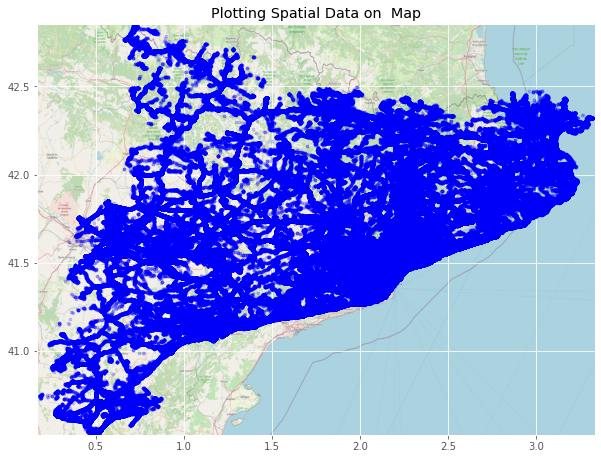

In [60]:
fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(df.long, df.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on  Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### next thing we would like to know what town has the best speed (by median) and how it reacts with signals and satellites


In [61]:
df.pivot_table(index=['town_name'],values=['speed','satellites','signal'],aggfunc='median').sort_values(by=['speed','signal'],ascending=False).head(60)

,satellites,signal,speed
town_name,,,
Viladasens,6.0,16.0,117.00
Ribera d'Ondara,7.0,13.0,114.70
Banyeres del Penedès,6.0,13.0,114.40
l'Albi,6.0,14.0,114.30
Fogars de la Selva,6.0,13.0,113.60
Estaràs,6.5,12.0,113.05
Castellnou de Seana,6.0,12.0,109.50
Santa Maria d'Oló,6.0,10.0,109.30
Argençola,7.0,15.0,107.60


### now let us try to plot the data to see where is our breaking point 
### that only 33 towns from our data have speeds median above 80 while most are at the "slow" speed area below 80

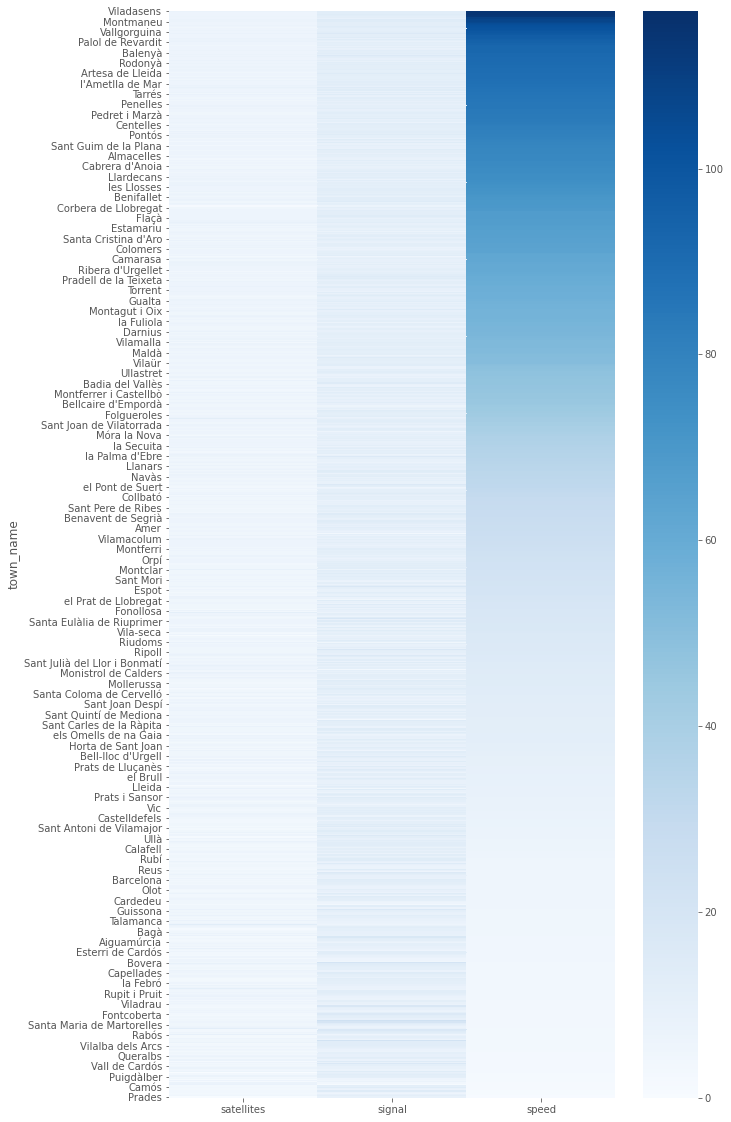

In [62]:
pivot = df.pivot_table(index=['town_name'],values=['speed','satellites','signal'],aggfunc='median').sort_values(by=['speed','signal'],ascending=False)
fig,ax=plt.subplots(figsize=(10,20))
sns.heatmap(pivot,cmap="Blues",ax=ax)
plt.show()

### we want to group by town and speed so that we can plot our data on a map


In [63]:

grou_df=df.groupby(['town_name'])['speed'].median().sort_values(ascending=False).reset_index(name='spead')
grou_df['town_name'].unique()

array(['Viladasens', "Ribera d'Ondara", 'Banyeres del Penedès', "l'Albi",
       'Fogars de la Selva', 'Estaràs', 'Castellnou de Seana',
       "Santa Maria d'Oló", 'Argençola', 'Montmaneu',
       'Castellet i la Gornal', 'Vilagrassa', 'la Pobla de Montornès',
       'Castelldans', 'Jorba', 'Aguilar de Segarra',
       'Sant Pere Sallavinera', 'la Masó', 'Vallgorguina',
       'la Bisbal del Penedès', 'Veciana', 'Subirats', 'la Granada',
       "Sant Sadurní d'Osormort", 'Argelaguer', 'Sanaüja', 'Olvan',
       'Palol de Revardit', 'Castellví de la Marca', 'Vila-rodona',
       'Golmés', 'Puig-reig', 'Aiguaviva', 'els Hostalets de Pierola',
       'Castellfollit de Riubregós', 'Balenyà', 'Òdena', 'Pallejà',
       'Alcanó', 'Freginals', 'Castellolí', 'Riudellots de la Selva',
       'Malla', 'Sarroca de Lleida', 'Vall-llobrega', 'Rodonyà', 'Pujalt',
       'Maçanet de la Selva', 'Godall', 'Calonge de Segarra',
       'el Pla de Santa Maria', 'Caldes de Malavella', 'Garrigàs',
       '

### let us get the towns that have speed at above 50 and plot our distribution on a map


In [64]:
top_speed_df_filtered = df[df['town_name'].isin(['Viladasens', "Ribera d'Ondara", 'Banyeres del Penedès',
       'Fogars de la Selva', "l'Albi", 'Estaràs', "Santa Maria d'Oló",
       'Castellnou de Seana', 'Argençola', 'Montmaneu',
       'Castellet i la Gornal', 'Vilagrassa', 'Jorba',
       'Sant Pere Sallavinera', 'la Pobla de Montornès', 'la Masó',
       'Castelldans', 'Aguilar de Segarra', 'Veciana',
       'la Bisbal del Penedès', 'Vallgorguina', 'Subirats', 'la Granada',
       "Sant Sadurní d'Osormort", 'Sanaüja', 'Argelaguer', 'Olvan',
       'Palol de Revardit', 'Balenyà', 'Castellví de la Marca', 'Alcanó'])]


In [65]:
top_speed_df_filtered = df[df['speed']>50]
                       

In [66]:
Box = ((top_speed_df_filtered.long.min(),   top_speed_df_filtered.long.max(),      
         top_speed_df_filtered.lat.min(), top_speed_df_filtered.lat.max()))
print(BBox)

(0.16541, 3.33176, 40.52332, 42.85537)


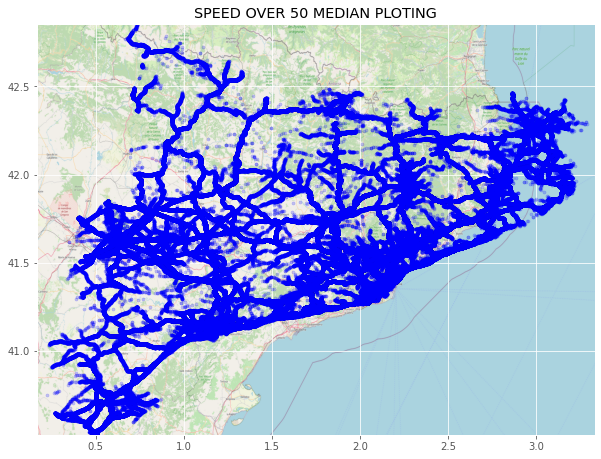

In [67]:
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(top_speed_df_filtered.long, top_speed_df_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('SPEED OVER 50 MEDIAN PLOTING')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### now we will plot towns below 50 and plot the, on a map as well

In [68]:
slow_speed_df_filtered = df[df['town_name'].isin(['els Hostalets de Pierola', 'Castellfollit de Riubregós',
       'Sarroca de Lleida', 'Malla', 'Vall-llobrega', 'Godall', 'Alfés',
       'Aiguaviva', 'Pujalt', "Vilanova de l'Aguda", 'Calonge de Segarra',
       'Pallejà', 'Fondarella', 'Rodonyà', 'Torrelameu', 'Caseres',
       'Artesa de Lleida', 'Riudellots de la Selva',
       'Caldes de Malavella', "Bellmunt d'Urgell", 'Garrigàs',
       'el Pla de Santa Maria', 'Bàscara', 'Siurana', 'Vila-rodona',
       'Granyanella', 'Camarles', 'Maçanet de la Selva',
       'Tarroja de Segarra', 'Verdú', 'Biosca', "l'Ametlla de Mar",
       'Llobera', 'Copons', 'Ossó de Sió', 'Foradada', 'Penelles',
       'Montmeló', 'Cervià de Ter', 'Menàrguens', 'Pedret i Marzà',
       'Oliola', 'la Riera de Gaià', 'Figaró-Montmany', "l'Ampolla",
       'Alcoletge', 'Vilanant', 'Orís', 'Sant Ferriol', "l'Aldea",
       'la Pobla de Claramunt', 'Mont-roig del Camp', 'Vinaixa', 'Tarrés',
       'Castellfollit del Boix', 'Barberà de la Conca', 'Avinyó',
       'Corbins', 'Centelles', 'Balsareny', 'Tagamanent', 'els Guiamets',
       'Alcover', 'Tona', 'Pontós', 'Aldover', 'Torrebesses',
       'Castelló de Farfanya', 'Sidamon', 'Biure', 'Rasquera',
       'Pinell de Solsonès', 'Gironella', 'Montgai',
       "l'Espluga de Francolí", "la Tallada d'Empordà", 'Soses',
       "Bellcaire d'Urgell", 'Muntanyola', 'Cabanabona', 'Bassella',
       'Ginestar', 'Preixens', "Cabrera d'Anoia", 'la Sentiu de Sió',
       'Cabanelles', 'els Alamús', "Puigverd d'Agramunt", 'Cervera',
       'Canyelles', 'Vimbodí i Poblet', 'Alió', 'Vilaverd', 'el Papiol',
       'Saus, Camallera i Llampaies', 'Torroella de Fluvià', 'Llardecans',
       'Esparreguera', 'Garcia', 'Talavera', 'Massoteres', 'Duesaigües',
       'Callús', 'Sant Ramon', 'Ultramort', 'Cabra del Camp',
       'Almacelles', 'Argentona', 'les Llosses', 'Sant Julià de Ramis',
       'Vacarisses', 'la Galera', 'Sant Pere de Riudebitlles', 'la Pera',
       'Sils', 'Albatàrrec', 'Barbens', 'Benifallet',
       "les Valls d'Aguilar", 'Vidreres', 'el Milà', 'Pira',
       'Os de Balaguer', 'Vilabella', 'Vallfogona de Balaguer',
       'els Prats de Rei', 'el Bruc', 'Roda de Barà', 'Abrera', 'Bolvir',
       'Estamariu', 'Rajadell', 'Senterada', 'Ordis', 'Anglesola',
       'Sant Guim de la Plana', 'Isona i Conca Dellà',
       'Castellbell i el Vilar', 'Sant Jaume de Llierca', 'Brunyola',
       'Flaçà', 'Borrassà', 'Xerta', 'Sant Martí de Centelles', 'Nulles',
       'Serra de Daró', 'Sant Joan de Mollet', 'el Pont de Bar',
       'les Avellanes i Santa Linya', 'Santa Fe del Penedès', 'Nalec',
       'la Floresta', 'Vallmoll', 'Alàs i Cerc', 'les Borges Blanques',
       'Colomers', 'la Fatarella', 'Montcada i Reixac', 'Torres de Segre',
       "el Far d'Empordà", 'Masdenverge', 'Sant Feliu de Buixalleu',
       'Artesa de Segre', 'Ivorra', 'Bellpuig', 'Maià de Montcal',
       'Serinyà', 'Castellar de la Ribera', 'Térmens', 'Viladecavalls',
       'Puig-reig', 'Gurb', 'Jafre', "la Torre de l'Espanyol",
       'Cassà de la Selva', 'les Piles', 'Puiggròs', 'els Garidells',
       'Guardiola de Berguedà', 'Camarasa', "Ribera d'Urgellet",
       'Arsèguel', 'Pradell de la Teixeta', 'Riudecols', 'Castellgalí',
       'Crespià', 'Constantí', "l'Arboç", 'Oristà', 'Torrent',
       'Solivella', "Vandellòs i l'Hospitalet de l'Infant",
       'les Masies de Voltregà', 'Vallclara', "Santa Cristina d'Aro",
       'Vinyols i els Arcs', 'Castell de Mur', 'Vilajuïga',
       'la Vall de Bianya', 'Granyena de les Garrigues',
       'Sant Bartomeu del Grau', 'Ripollet', 'Sant Jordi Desvalls',
       'Perafort', 'Parlavà', 'Pont de Molins', 'Montgat', 'Gualta',
       'Massanes', 'Botarell', 'Fontanals de Cerdanya', 'Peramola',
       'Oliana', 'Creixell', 'Sant Martí Vell', 'Puigpelat', 'Algerri',
       'Garriguella', 'Viladamat', "Sant Llorenç d'Hortons", 'Talarn',
       'Llers', 'la Fuliola', 'Darnius', 'Cercs', 'les Valls de Valira',
       'Avinyonet de Puigventós', 'Rialp', 'Vilopriu',
       'Puigverd de Lleida', 'Sant Cugat Sesgarrigues', 'Castellbisbal',
       'Vilallonga del Camp', 'Gualba', 'Llambilles', 'Albinyana',
       'Ivars de Noguera', "Caldes d'Estrac", 'Vilamalla', 'Tornabous',
       'Maldà', 'Castellserà', 'la Roca del Vallès', 'Palafolls',
       'Sant Mateu de Bages', 'Sarrià de Ter', 'Vilaür', 'Corçà', 'Sora',
       'Fornells de la Selva', 'Llavorsí', 'Montagut i Oix',
       'Vilanova de la Barca', 'Sant Gregori', "Vilobí d'Onyar",
       'Alcarràs', 'Vilademuls', "Sant Martí d'Albars", 'Isòvol',
       'Olèrdola', 'Forallac', 'la Riba', 'Cornellà del Terri',
       "la Guingueta d'Àneu", 'Calders', 'Fortià', 'Torre-serona',
       'Tírvia', 'Juià', 'Corbera de Llobregat', 'Pau',
       'Sant Vicenç de Montalt', 'Agullana', 'Ullastret', 'Ciutadilla',
       'Santa Maria de Merlès', 'el Poal', 'el Cogul', 'Coll de Nargó',
       'Montornès del Vallès', 'Vinebre', 'Prat de Comte', 'Campelles',
       'Montferrer i Castellbò', 'Fígols i Alinyà', 'Alfarràs',
       'Parets del Vallès', 'Torrefarrera', 'Sant Pol de Mar',
       'Santa Maria de Miralles', 'Lladurs', 'Tordera', 'Santa Oliva',
       "l'Espunyola", 'Regencós', 'Navata', "Corbera d'Ebre",
       "l'Ametlla del Vallès", 'Sant Vicenç de Castellet',
       'Sant Fruitós de Bages', 'Bellprat', 'Vilanova del Vallès',
       'Folgueroles', 'Renau', 'Sant Pau de Segúries', 'el Masroig',
       'Badia del Vallès', 'Campllong', 'Peralada', 'Toses',
       'Avinyonet del Penedès', 'Baix Pallars', 'Cabrera de Mar',
       "Bellcaire d'Empordà", 'Fulleda', 'Casserres',
       'Vilanova de Prades', 'Urús', 'Maials', 'el Soleràs',
       'la Vilella Baixa', 'Juneda', 'Santa Bàrbara',
       'Sant Feliu de Pallerols', 'Guils de Cerdanya', 'Celrà', 'Llorac',
       'Juncosa', 'Sagàs', "la Palma d'Ebre", "Vallbona d'Anoia",
       'Santa Perpètua de Mogoda', 'la Portella', 'Riumors',
       'Figuerola del Camp', 'Vilablareix', 'Linyola', 'la Granadella',
       'la Secuita', 'Quart', "Santa Llogaia d'Àlguema", 'els Torms',
       'Móra la Nova', 'les Borges del Camp', 'Riudaura',
       'la Palma de Cervelló', 'Es Bòrdes', "l'Espluga Calba",
       'Torrefeta i Florejacs', 'Preixana', 'el Pont de Suert', 'Verges',
       'Olius', 'Sant Joan de Vilatorrada', 'Montesquiu', 'la Figuera',
       'Llanars', 'Arbeca', "l'Albagés", 'Palau-solità i Plegamans',
       'Santa Maria de Palautordera', 'Sant Martí Sarroca',
       'Sant Feliu de Codines', 'Bescanó', 'Vilalba Sasserra', 'Almenar',
       'Navàs', 'Vilanova de Segrià', "el Pont d'Armentera", 'Soriguera',
       'Valls', 'el Perelló', 'Ascó', 'Alcanar', "Castelló d'Empúries",
       'Prullans', 'Mont-ras', 'Vallcebre', "el Palau d'Anglesola",
       'Terrades', 'Mollet del Vallès', 'Sitges',
       'Sant Andreu de la Barca', 'la Vajol', 'Montmajor',
       'Cànoves i Samalús', 'Capmany', 'Olost', 'Alella', 'Vilamacolum',
       'Flix', 'Sant Jaume dels Domenys', 'Tiana', 'Riudarenes', 'Seva',
       'Palau-saverdera', 'Riu de Cerdanya', 'la Garriga',
       'la Pobla de Segur', 'Balaguer', 'Cervelló', 'Albesa',
       'Sant Miquel de Fluvià', 'les Cabanyes', 'Sant Agustí de Lluçanès',
       'la Nou de Gaià', 'Santa Maria de Besora', 'Montferri',
       'Llagostera', 'Premià de Dalt', 'Alguaire', 'Montclar', 'Cabó',
       'Bordils', 'Margalef', 'Altafulla', 'Cornudella de Montsant',
       'Calaf', 'Vilada', 'Arbúcies', 'Vilanova de Bellpuig',
       'Cervià de les Garrigues', 'Sant Pere de Ribes', "l'Estany",
       'Riner', 'Almatret', 'Amer', 'Martorell', 'Lles de Cerdanya',
       'Santa Maria de Corcó', 'Montbrió del Camp', 'els Plans de Sió',
       'Sant Hilari Sacalm', 'Collbató', 'Sant Adrià de Besòs',
       'Sant Esteve Sesrovires', 'Tivenys', 'Almoster',
       'Cerdanyola del Vallès', 'Ulldemolins', 'Collsuspina', 'Ulldecona',
       'Vespella de Gaià', 'Ponts', 'la Cellera de Ter', 'Forès',
       'Farrera', 'Cardona', 'Rupià', 'Canet de Mar',
       'Sant Vicenç de Torelló', 'Sant Celoni',
       'Santa Eulàlia de Riuprimer', 'la Bisbal de Falset', 'Calldetenes',
       'Lliçà de Vall', "Sant Jaume d'Enveja", "Vilanova d'Escornalbou",
       'Monistrol de Montserrat', 'Torroja del Priorat',
       "Riba-roja d'Ebre", "la Vall d'en Bas", 'la Selva del Camp',
       'Riudoms', 'Marganell', 'Sant Andreu de Llavaneres',
       'Pacs del Penedès', "l'Armentera", 'el Prat de Llobregat',
       'Vilanova de Meià', 'Tàrrega', 'Fonollosa', 'Molins de Rei',
       'Sudanell', 'Riells i Viabrea', 'Montblanc', 'Alp', 'Canovelles',
       'Benavent de Segrià', 'Vila-seca', 'Albons', 'Deltebre', 'Polinyà',
       'Orpí', 'Sant Vicenç dels Horts', 'Salàs de Pallars',
       'la Nou de Berguedà', 'el Masnou', 'Santa Eulàlia de Ronçana',
       'Organyà', 'Cabrils', 'Vilanova de Sau', 'Espot', 'Vilamòs',
       'Font-rubí', 'Sant Julià del Llor i Bonmatí', 'Sant Andreu Salou',
       'Cabanes', 'Sant Cebrià de Vallalta', 'Sant Julià de Cerdanyola',
       'Masllorenç', 'Sant Boi de Llobregat',
       'Sant Esteve de Palautordera', 'Guixers', 'el Morell',
       'Santa Margarida de Montbui', 'Alt Àneu', 'Sant Mori',
       'Boadella i les Escaules', 'Ripoll', 'Esponellà', 'Planoles',
       'la Llagosta', 'Das', 'Llinars del Vallès',
       'Santa Margarida i els Monjos', 'Santa Pau', "l'Aleixar",
       'Mollerussa', "Cruïlles, Monells i Sant Sadurní de l'Heura",
       'Tortosa', 'Espinelves', 'Guimerà', 'Castellnou de Bages',
       'Belianes', 'Alforja', 'Blancafort', 'la Quar', 'Bot',
       'Rocafort de Queralt', 'Ventalló', 'Borredà', 'Santpedor',
       'Clariana de Cardener', 'Mas de Barberans', "Ivars d'Urgell",
       'Manresa', 'Manlleu', 'Tarragona', 'les Franqueses del Vallès',
       'Sant Carles de la Ràpita', 'Passanant i Belltall',
       'Gimenells i el Pla de la Font', 'Garrigoles', 'Vallirana',
       'la Selva de Mar', 'els Omells de na Gaia', 'Bellvís',
       'Santa Coloma de Cervelló', 'la Jonquera', 'Monistrol de Calders',
       'Tavèrnoles', 'Maspujols', 'Gallifa', 'Llançà',
       'Santa Coloma de Queralt', 'Navès', 'Sallent', 'Hostalric',
       'Roses', 'Vilassar de Dalt', 'Montoliu de Segarra', 'Bonastre',
       'Sant Martí de Llémena', 'Castellvell del Camp',
       'les Masies de Roda', 'Sant Joan Despí', 'les Preses',
       'Vilobí del Penedès', 'Caldes de Montbui', 'Josa i Tuixén',
       'Cornellà de Llobregat', 'Calonge', 'Banyoles', 'Capolat',
       'Espolla', 'Sant Fost de Campsentelles', "Bell-lloc d'Urgell",
       'Salt', 'Sant Quintí de Mediona', 'Barberà del Vallès',
       'Vallfogona de Riucorb', 'Palau-sator', 'Fontanilles',
       'la Llacuna', "Lliçà d'Amunt", 'Sant Quirze del Vallès',
       'Sant Feliu de Llobregat', 'Porqueres', 'el Molar', 'Figueres',
       "la Seu d'Urgell", 'les Oluges', 'Castellar del Riu', 'Naut Aran',
       'Molló', 'Bossòst', 'el Brull', 'Sales de Llierca', 'Viladecans',
       'Benissanet', 'Tiurana', 'Torregrossa',
       'Santa Cecília de Voltregà', 'Esplugues de Llobregat',
       'Vilabertran', 'Santa Eugènia de Berga', 'Teià', 'Massalcoreig',
       'els Pallaresos', 'Lleida', 'Alfara de Carles',
       'la Pobla de Mafumet', 'Marçà', 'Sant Pere Pescador', 'Osor',
       'Llimiana', "l'Albiol", 'Campdevànol', 'Paüls', 'Prats i Sansor',
       'Aiguafreda', 'Martorelles', 'Castellterçol', 'la Canonja',
       'Pratdip', 'Artés', 'Prats de Lluçanès', 'Taradell', 'Ullà',
       'Sant Antoni de Vilamajor', 'Miravet', 'Vilafranca del Penedès',
       'Sunyer', 'Mollet de Peralada', 'el Vendrell', 'Campins', 'Salomó',
       'Riudecanyes', 'Torredembarra', 'Sant Just Desvern',
       'Arenys de Mar', 'el Pinell de Brai', 'Miralcamp', 'Terrassa',
       'Súria', 'Vila-sana', 'Sant Aniol de Finestres',
       'Olesa de Bonesvalls', 'Sant Julià de Vilatorta', 'Cunit',
       'Calella', 'Gavà', 'Sarral', 'Conesa', 'Granollers',
       'Sant Joan de les Abadesses', 'Vic', 'Roda de Ter',
       'Sant Martí Sesgueioles', 'la Vansa i Fórnols', 'Òrrius',
       'Santa Susanna', 'Gandesa', 'Vilassar de Mar',
       'Granyena de Segarra', 'Pardines', 'Sant Cugat del Vallès',
       'Montellà i Martinet', 'Mediona', 'Castelldefels', 'Granera',
       "la Granja d'Escarp", 'Santa Coloma de Gramenet',
       'la Baronia de Rialb', 'Seròs', 'Reus', 'Cubells', 'Mataró',
       'Igualada', 'Sant Llorenç Savall', 'Pontils', 'Susqueda', 'Àger',
       'Torelló', 'Gombrèn', 'Sant Pere de Vilamajor', 'Ribes de Freser',
       'Pineda de Mar', 'Rubió', 'Besalú', "l'Hospitalet de Llobregat",
       'Vielha e Mijaran', 'Vallbona de les Monges', 'Roquetes', 'Colera',
       'Barcelona', 'Sabadell', 'la Vall de Boí', 'Fígols', 'Blanes',
       'Perafita', 'Talamanca', 'Alòs de Balaguer', 'Horta de Sant Joan',
       'Savallà del Comtat', 'Dosrius', 'Girona', "Castellar de n'Hug",
       'Ogassa', 'Palafrugell', 'Pontons', 'Rubí', 'Fogars de Montclús',
       "Móra d'Ebre", 'Gelida', "Sant Sadurní d'Anoia",
       "Castell-Platja d'Aro", 'Badalona', 'Sant Joan les Fonts',
       'Esterri de Cardós', 'Bigues i Riells', 'Berga',
       'la Torre de Cabdella', 'Sobremunt', 'Aiguamúrcia',
       'Malgrat de Mar', 'Abella de la Conca', 'Gaià',
       'Llorenç del Penedès', 'la Torre de Claramunt', 'Bagà', 'Calafell',
       'Cardedeu', 'Carme', 'Camprodon', 'Conca de Dalt', 'Olot',
       'Mieres', 'Colldejou', 'Palamós', 'Alpens', 'Gavet de la Conca',
       'Sarroca de Bellera', 'la Pobla de Cérvoles', 'Bellvei',
       'Meranges', 'Gratallops', "Canet d'Adri",
       'Sant Esteve de la Sarga', 'Sant Miquel de Campmajor',
       'Montoliu de Lleida', 'la Molsosa', 'Bellver de Cerdanya',
       'Mont-ral', 'Sant Jaume de Frontanyà', 'Mura',
       'la Coma i la Pedra', 'el Lloar', 'Arres',
       'Santa Coloma de Farners', 'Masquefa', "la Bisbal d'Empordà",
       'el Vilosell', 'el Pont de Vilomara i Rocafort',
       'Castellar del Vallès', 'la Morera de Montsant', 'Rosselló',
       'Pals', 'la Febró', 'Olesa de Montserrat', 'Llívia',
       'Rupit i Pruit', 'Pinós', "l'Argentera", 'Porrera',
       'el Pla del Penedès', "l'Escala", 'Salou', 'Tavertet', 'Cadaqués',
       'la Sénia', 'Arenys de Munt', 'Sant Quirze Safaja', 'Cambrils',
       'Arnes', 'Viladrau', 'Sant Feliu de Guíxols', 'Setcases', 'Breda',
       'Torroella de Montgrí', 'Tremp', 'Sant Boi de Lluçanès',
       'el Catllar', 'Avià', 'Poboleda', 'Puigcerdà', 'Olivella',
       'els Omellons', 'Rabós', 'Guissona', 'Sant Hipòlit de Voltregà',
       'Santa Maria de Martorelles', 'Odèn', 'Cava',
       'Castellví de Rosanes', 'Sant Quirze de Besora', 'Sort',
       'Bellaguarda', 'Portbou', 'Vilanova i la Geltrú',
       'Torrelles de Llobregat', 'Torrelles de Foix', 'Begues', 'Foixà',
       'Montornès de Segarra', 'Matadepera', 'Lluçà',
       'Sant Climent Sescebes', 'Les', 'Sant Llorenç de la Muga',
       'Lloret de Mar', 'Bausen', 'Cantallops',
       'Castellfollit de la Roca', 'Bovera', 'Tossa de Mar', 'Torà',
       'Solsona', 'Falset', 'Capellades', 'Alins', 'Albanyà', 'Queralbs',
       'Lladó', 'Gósol', 'Lladorre', 'Saldes', 'Vidrà', 'el Rourell',
       'Piera', 'la Vilella Alta', 'Premià de Mar', 'Navarcles',
       'Cistella', "les Planes d'Hostoles", 'Vilallonga de Ter', 'Querol',
       'Amposta', 'Rellinars', 'Bellmunt del Priorat',
       'Sant Climent de Llobregat', 'Batea', 'Maçanet de Cabrenys',
       'Vilafant', "Esterri d'Àneu", 'Begur', 'Sant Martí de Riucorb',
       'Vila-sacra', 'Castellcir', 'Gisclareny', 'Sant Guim de Freixenet',
       'Cabacés', 'la Pobla de Lillet', 'Tortellà', 'Vilamaniscle',
       'Madremanya', 'Sant Llorenç de Morunys', 'Anglès', 'Cubelles',
       'Vall de Cardós', 'Sentmenat', 'Vilanova del Camí', 'Capafonts',
       'Sant Iscle de Vallalta', 'el Port de la Selva', 'Ger', 'Agramunt',
       "Castell de l'Areny", 'Alpicat', 'la Torre de Fontaubella',
       'Vallromanes', 'Sant Salvador de Guardiola', 'Canejan', 'Arbolí',
       'Vilaplana', 'Moià', 'Sant Martí de Tous', 'Capçanes',
       'Puigdàlber', 'Viver i Serrateix', 'Vilaller',
       'Sant Pere de Torelló', 'Tivissa', 'Ullastrell',
       'Sant Feliu Sasserra', 'Palau de Santa Eulàlia',
       'Vilalba dels Arcs', 'Vallfogona de Ripollès', 'el Montmell',
       'Camós', 'Montseny', 'Masarac', 'Prades', 'Aspa', 'Aitona',
       'la Pobla de Massaluca', 'Beuda', 'Bràfim', 'Fontcoberta',
       'Torrelavit'])]

In [69]:
slow_speed_df_filtered = df[df['speed']<50]

In [70]:
Box = ((slow_speed_df_filtered.long.min(),   slow_speed_df_filtered.long.max(),      
         slow_speed_df_filtered.lat.min(), slow_speed_df_filtered.lat.max()))
print(BBox)

(0.16541, 3.33176, 40.52332, 42.85537)


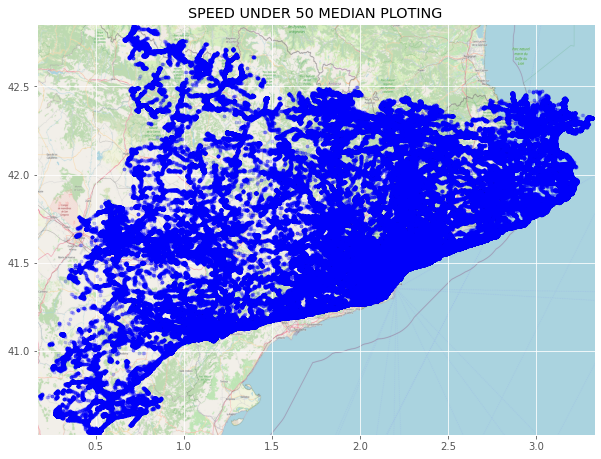

In [71]:
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(slow_speed_df_filtered.long, slow_speed_df_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('SPEED UNDER 50 MEDIAN PLOTING')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### we can see that the map that plots town at speeds less than 50 is much denser we can conclude that a lot more area of Catalonia has "slow" speed that is 50 or less 

## now let us try to see the effect of the network type 2g,3g,4g
### we will start by creating an integer column that corresponds with the type of network so that we can plot it 
### as we can the Barcelona has the highest count of 4g measurements 

In [72]:
conditions = [
    (df['net'] == "2G"),
    (df['net'] == "3G"),
    (df['net'] == "4G") 
]

values = [2,3,4]

df['net_number'] = np.select(conditions, values)

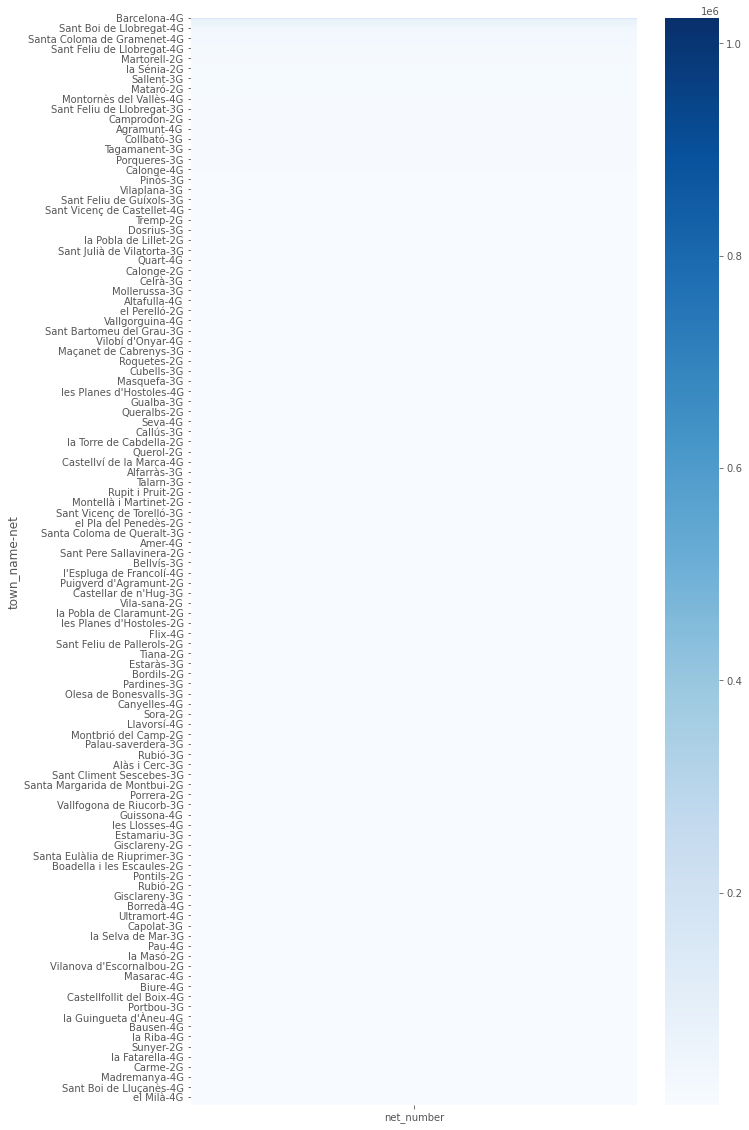

In [73]:
pivot = df.pivot_table(index=['town_name','net'],values=['net_number'],aggfunc={'net_number':'count'}).sort_values(by=['net_number'],ascending=False)
fig,ax=plt.subplots(figsize=(10,20))
sns.heatmap(pivot,cmap="Blues",ax=ax)
plt.show()

### let us look at the data more closely and examin it with a pivot 
### we can clearly see the Barcelona has a greater number of 4g measurements by far 

In [74]:
df.pivot_table(index=['town_name','net'],values=['net_number'],aggfunc='count').sort_values(by=['net_number'],ascending=False).head(60)

net_number
town_name                 net            
Barcelona                 4G      1024205
                          3G       574594
                          2G       210989
Lleida                    4G       144726
l'Hospitalet de Llobregat 4G       108536
Sant Cugat del Vallès     3G        87071
Girona                    4G        85743
Reus                      2G        77601
                          3G        72045
Sant Cugat del Vallès     4G        67762
Vilafranca del Penedès    4G        65215
Manresa                   3G        63742
Terrassa                  4G        63222
l'Hospitalet de Llobregat 3G        63094
Badalona                  4G        62777
                          3G        62399
Sabadell                  4G        59319
Lleida                    3G        56976
Reus                      4G        54787
Granollers                4G        53722
Sabadell                  3G        52305
Lleida                    2G        51334
Mataró                    4G        48647
Cornellà de Llobregat     4G        43238
el Prat de Llobregat      4G        42201
Sant Joan Despí           4G        41026
Sant Boi de Llobregat     4G        37608
Sant Cugat del Vallès     2G        36457
Tarragona                 4G        36269
Vilanova i la Geltrú      4G        35642
Terrassa                  3G        35587
Esplugues de Llobregat    4G        34071
Vilafranca del Penedès    2G        31785
Cerdanyola del Vallès     4G        31747
Tarragona                 3G        31676
Girona                    3G        31263
Llinars del Vallès        4G        31109
                          3G        29910
Girona                    2G        29809
Granollers                3G        28056
Olot                      4G        27895
Montcada i Reixac         4G        27449
Castellbisbal             4G        26780
Sant Quirze del Vallès    4G        25816
Rubí                      4G        25446
Vic                       4G        25333
                          3G        25317
Mataró                    3G        25180
Manresa                   2G        25074
Esplugues de Llobregat    3G        24540
Castellví de Rosanes      2G        23734
Manresa                   4G        23564
Santa Coloma de Gramenet  4G        22754
Mollet del Vallès         4G        22531
Viladecans                4G        22439
Amposta                   3G        22430
Cardedeu                  3G        22195
Olot                      3G        21607
Sant Boi de Llobregat     3G        21447
Montcada i Reixac         3G        21308

## now we want to understand how are the network types distributed on our map 
### after plotting all 3 network types we can see that 3g has a much denser plotting area we can conclude that  3g is more spread than 4g and 2g and is more in use 

In [75]:

network_filtered = df[df['net'].isin(['2G'])] 

In [76]:
Box = ((network_filtered.long.min(),   network_filtered.long.max(),      
         network_filtered.lat.min(), network_filtered.lat.max()))
print(BBox)

(0.16541, 3.33176, 40.52332, 42.85537)


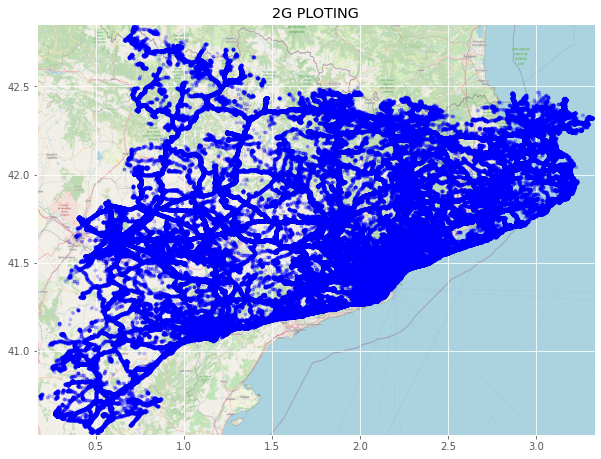

In [77]:
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(network_filtered.long, network_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('2G PLOTING')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

(0.16541, 3.33176, 40.52332, 42.85537)


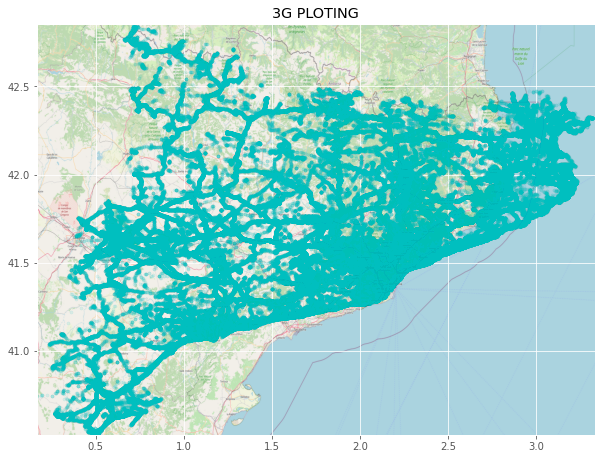

In [78]:
network_filtered = df[df['net'].isin(['3G'])]
Box = ((network_filtered.long.min(),   network_filtered.long.max(),      
         network_filtered.lat.min(), network_filtered.lat.max()))
print(BBox)
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(network_filtered.long, network_filtered.lat, zorder=1, alpha= 0.1, c='c', s=10)
ax.set_title('3G PLOTING')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

(0.16541, 3.33176, 40.52332, 42.85537)


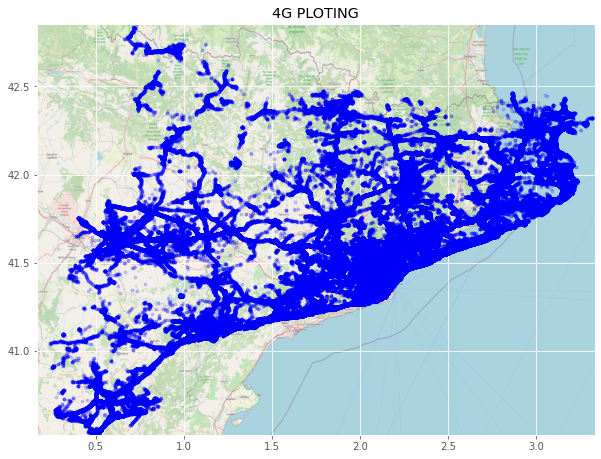

In [79]:
network_filtered = df[df['net'].isin(['4G'])]
Box = ((network_filtered.long.min(),   network_filtered.long.max(),      
         network_filtered.lat.min(), network_filtered.lat.max()))
print(BBox)
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(network_filtered.long, network_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('4G PLOTING')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### we can further see that by pivoting our data and counting the values we can see that although 4g has considered more count values 
### it is used in fewer places around Catalonia as we saw in the plotting of the geolocation of networks on our map

In [80]:
df.pivot_table(index=['net',],values=['net_number'],aggfunc='count').sort_values(by=['net_number'],ascending=False)

,net_number
net,
4G,3884973
3G,3357744
2G,1898393


### if we dive a deep deeper to the data we can see how steep is the decline of 4g use from city to city, Barcelona has a much greater use of 4g networks 

In [81]:
bar_plot=df.pivot_table(index=['town_name','net',],values=['net_number'],aggfunc='count').sort_values(by=['net_number'],ascending=False).head(10)

<AxesSubplot:xlabel='town_name,net'>

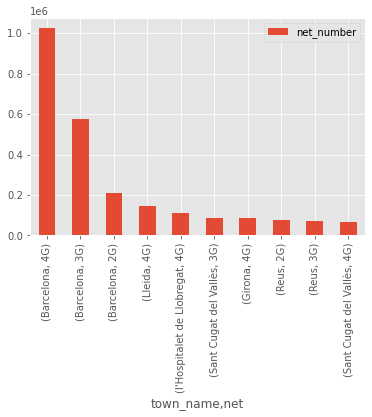

In [82]:
bar_plot.plot(kind="bar")

In [86]:
df['postal_code'] = df['postal_code'].astype(str)
df['region_code'] = df['postal_code'].str[:1]


conditions = [
    (df['region_code'] == "8"),
    (df['region_code'] == "1"),
     (df['region_code'] == "2"),
    (df['region_code'] == "4") 
]

values = ['Barcelona','Girona','Lleida','Tarragona']

df['region_code'] = np.select(conditions, values)

In [87]:
df.pivot_table(index=['net','region_code'],values=['net_number'],aggfunc='count').sort_values(by=['net_number'],ascending=False)

,,net_number
net,region_code,
4G,Barcelona,2959071
3G,Barcelona,2272038
2G,Barcelona,1037538
3G,Girona,436833
4G,Girona,404116
3G,Tarragona,346832
2G,Girona,323065
3G,Lleida,302041
2G,Lleida,292138


## let's try to consolidate our data a bit to try to understand where we need to focus to improve the situation 
### we can use the postal code data and FedEx website to determine the regions of Catalonia 
### we can see that we can divide Catalonia into 4 regions by postal code 
### postal codes that start with 8 is the Barcelona region
### postal codes that start with 1 is the Girona region
### postal codes that start with 2 is the Lleida region
### postal codes that start with 3 is the Tarragona region


conditions = [
    (df['region_code'] == "8"),
    (df['region_code'] == "1"),
     (df['region_code'] == "2"),
    (df['region_code'] == "4") 
]

values = ['Barcelona','Girona','Lleida','Tarragona']

df['region_code'] = np.select(conditions, values)

<AxesSubplot:xlabel='region_code'>

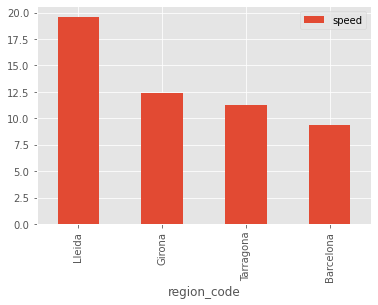

In [88]:
bar_plot_region=df.pivot_table(index=['region_code'],values=['speed'],aggfunc='median').sort_values(by=['speed'],ascending=False).head(10)
bar_plot_region.plot(kind="bar")

### we can see that the greatest improvement needs to be done in Barcelona region, even though it has the highest count of 4g network that is mostly concentrated in the town of Barcelona while the region as a whole suffers from an overall lowest network speed 

# i can conclude that from my finding I would recoment the government of Catalonia to improve infrastructure by spreading high-speed networks (4G), not only in main cities but overall in the Catalonia area 